<a href="https://colab.research.google.com/github/pach28/Predict-Calorie-Expenditure/blob/main/eda_modelado_ml_pce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pt1

#instalamos librerias necesarias e iniciamos sesion de kaggle para acceder a la data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests

sns.set_style('whitegrid')

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!pip install dabl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.5/558.5 kB 12.7 MB/s eta 0:00:00


In [ ]:
import dabl

In [ ]:
import kagglehub
kagglehub.login()

Kaggle credentials set.
Kaggle credentials successfully validated.


In [ ]:
import os

# Download the competition dataset
playground_series_s5e4_path = kagglehub.competition_download('playground-series-s5e5')
# Extract the directory name from the downloaded path
dataset_dir = os.path.splitext(playground_series_s5e4_path)[0]

# Construct the correct paths to the train.csv and test.csv files
train_csv_path = os.path.join(dataset_dir, 'train.csv')
test_csv_path = os.path.join(dataset_dir, 'test.csv')
sample_submission_csv_path = os.path.join(dataset_dir, 'sample_submission.csv')
# Read the CSV files using the correct paths
train_df = pd.read_csv(train_csv_path)
test_df = pd.read_csv(test_csv_path)
sample_submission_df = pd.read_csv(sample_submission_csv_path)

100%|██████████| 12.5M/12.5M [00:00<00:00, 93.3MB/s]

Extracting files...


In [ ]:
#datos extra
dataset_name = "ruchikakumbhar/calories-burnt-prediction"
extra = os.path.splitext(kagglehub.dataset_download(dataset_name))[0]
train_extra_path = os.path.join(extra, 'calories.csv')
train_extra_df = pd.read_csv(train_extra_path)

In [ ]:
train_extra_df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [ ]:
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [ ]:
test_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


#EDA

look for the main relationship between data

In [ ]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [ ]:
test_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,874999.500000,41.452464,174.725624,75.147712,15.415428,95.479084,40.036093
std,72168.927986,15.177769,12.822039,13.979513,8.349133,9.450161,0.778448
min,750000.000000,20.000000,127.000000,39.000000,1.000000,67.000000,37.100000
25%,812499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,874999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,937499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.600000
max,999999.000000,79.000000,219.000000,126.000000,30.000000,128.000000,41.500000


dismiss outlier data that produce no related noise

In [ ]:
#haremos columnas que abarquen edades de 10 en 10
train_df_copy = train_df.copy()
train_df_copy['age_group_20_30'] = train_df_copy['Age'].apply(lambda x: 1 if 20 <= x < 30 else 0)
train_df_copy['age_group_30_40'] = train_df_copy['Age'].apply(lambda x: 1 if 30 <= x < 40 else 0)
train_df_copy['age_group_40_50'] = train_df_copy['Age'].apply(lambda x: 1 if 40 <= x < 50 else 0)
train_df_copy['age_group_50_60'] = train_df_copy['Age'].apply(lambda x: 1 if 50 <= x < 60 else 0)
train_df_copy['age_group_60_70'] = train_df_copy['Age'].apply(lambda x: 1 if 60 <= x < 70 else 0)
train_df_copy['age_group_70_plus'] = train_df_copy['Age'].apply(lambda x: 1 if 70 <= x else 0)

In [ ]:
train_df_copy.drop('Age', axis=1, inplace=True)

In [ ]:
#sacamos el imc
train_df_copy['imc'] = train_df_copy['Weight'] / (train_df_copy['Height']/100)**2

In [ ]:
train_df_copy.drop(['Height', 'Weight'], axis=1, inplace=True)

In [ ]:
#codificar Sex donde , male sea 1 y female 0
train_df_copy['Sex'] = train_df_copy['Sex'].apply(lambda x: 1 if x == 'male' else 0)

In [ ]:
train_df_copy.head()

,id,Sex,Duration,Heart_Rate,Body_Temp,Calories,age_group_20_30,age_group_30_40,age_group_40_50,age_group_50_60,age_group_60_70,age_group_70_plus,imc
0,0,1,26.0,101.0,41.0,150.0,0,1,0,0,0,0,22.955684
1,1,0,8.0,85.0,39.7,34.0,0,0,0,0,1,0,22.582709
2,2,0,7.0,84.0,39.8,29.0,0,0,0,1,0,0,24.690405
3,3,1,25.0,105.0,40.7,140.0,1,0,0,0,0,0,24.414062
4,4,0,25.0,102.0,40.6,146.0,0,1,0,0,0,0,22.136740


In [ ]:
#haremos una columna de relacion entre duration y heart rate, duration y body temp
train_df_copy['duration_heart_rate'] = train_df_copy['Duration'] * train_df_copy['Heart_Rate']
train_df_copy['duration_body_temp'] = train_df_copy['Duration'] * train_df_copy['Body_Temp']
train_df_copy['heart_rate_per_duration'] = train_df_copy['Heart_Rate'] / train_df_copy['Duration']
train_df_copy['body_temp_per_duration'] = train_df_copy['Body_Temp'] / train_df_copy['Duration']
train_df_copy['temp_per_rate'] = train_df_copy['Body_Temp'] / train_df_copy['Heart_Rate']

<Axes: >

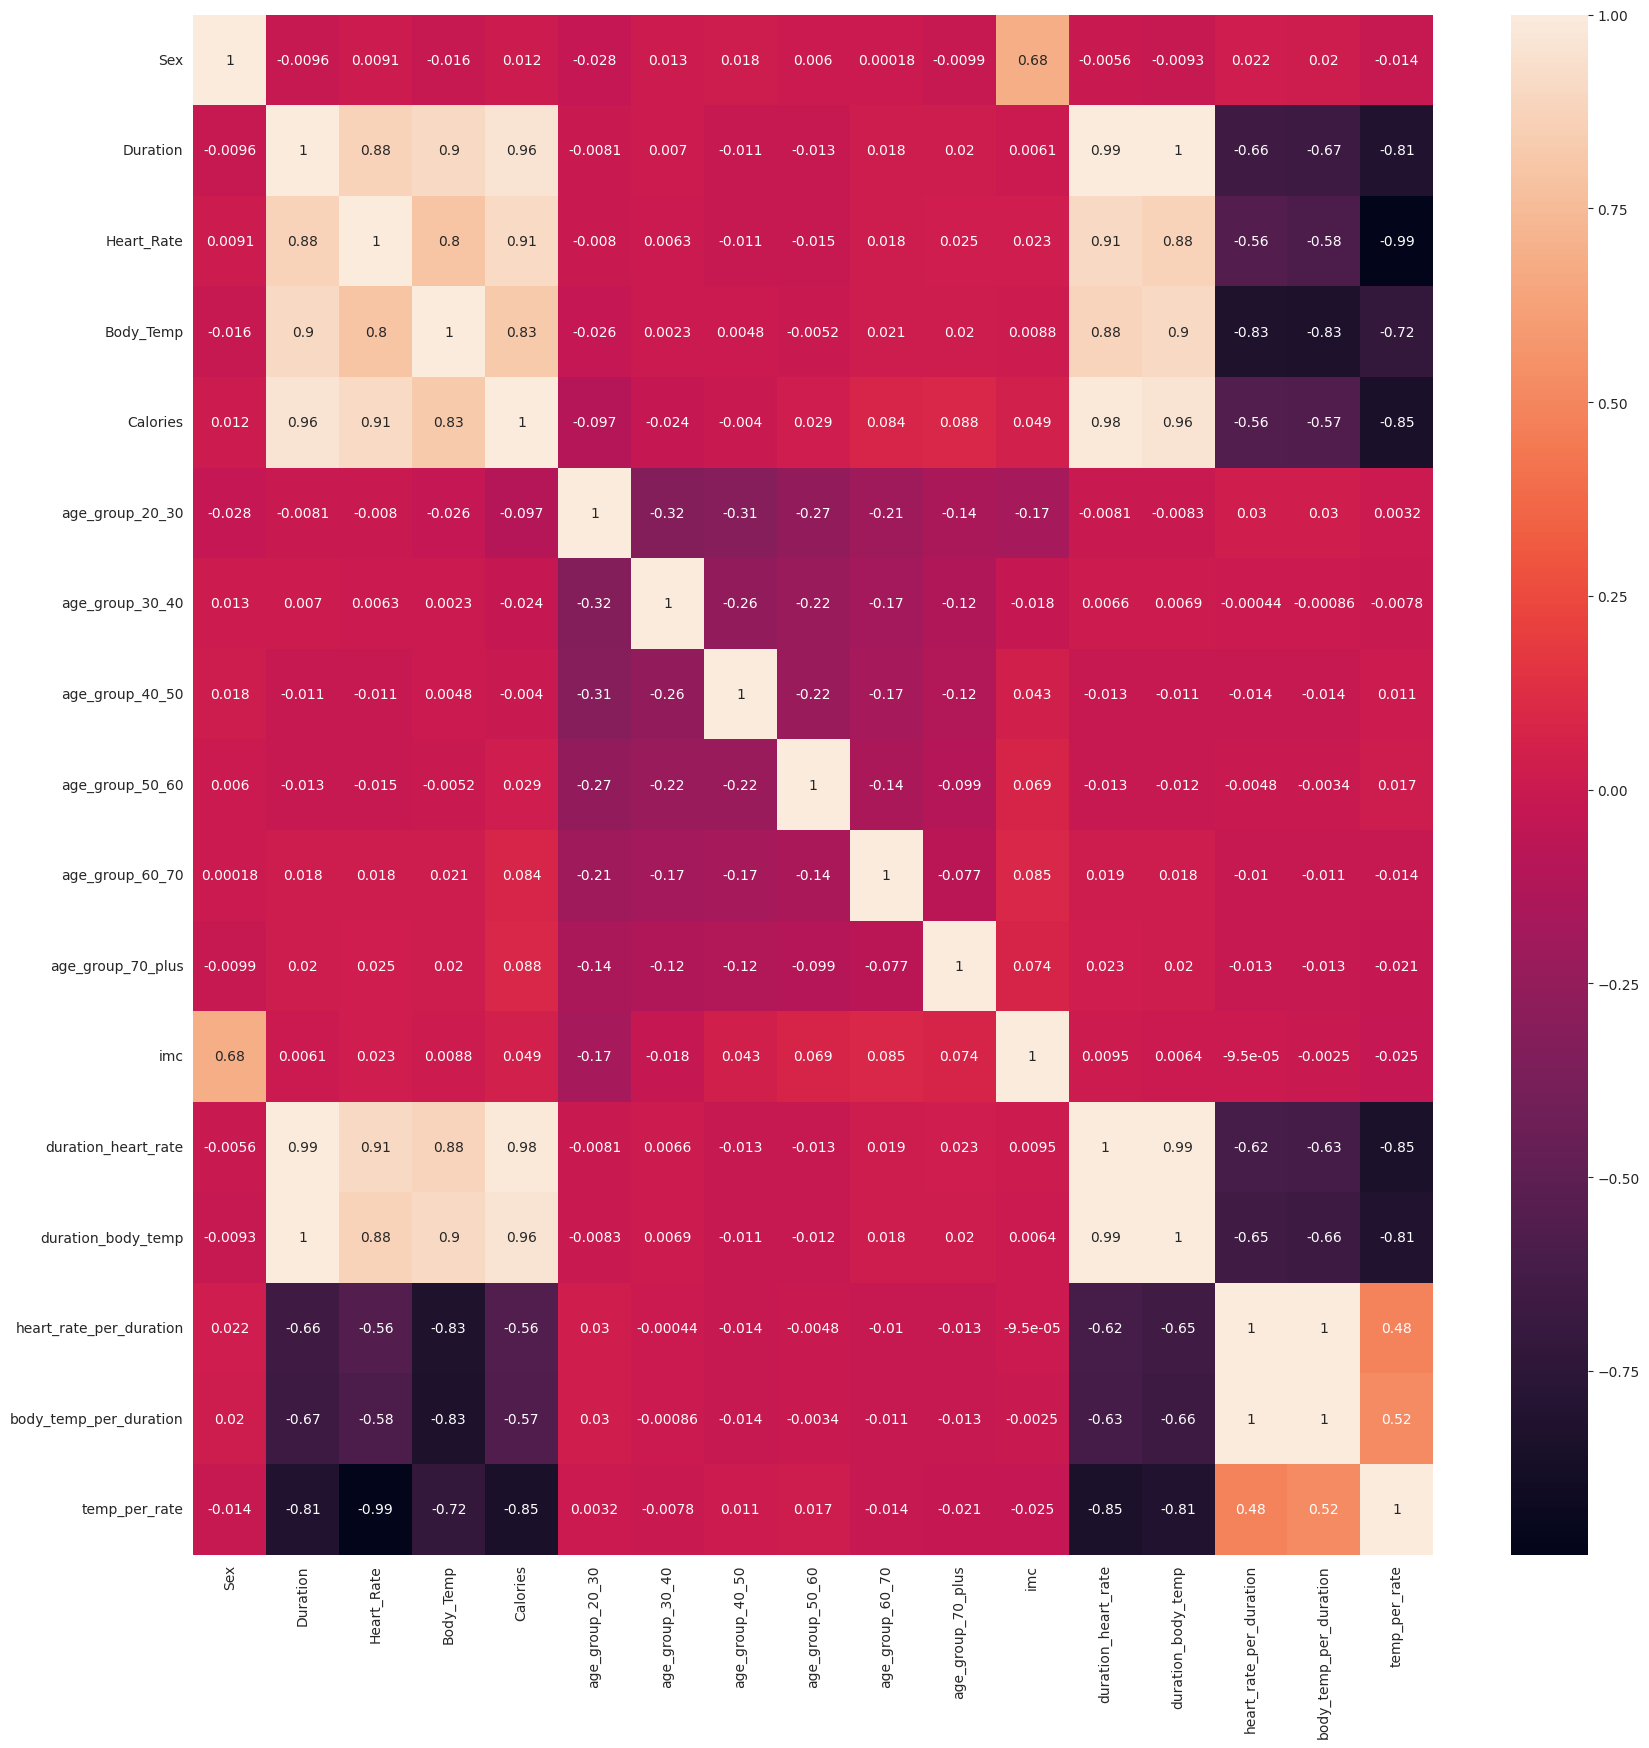

In [ ]:
#heatmap de train_df_Copy
plt.figure(figsize=(20,20))
sns.heatmap(train_df_copy.drop('id',axis=1).corr(), annot=True)

<Axes: xlabel='Duration', ylabel='Calories'>

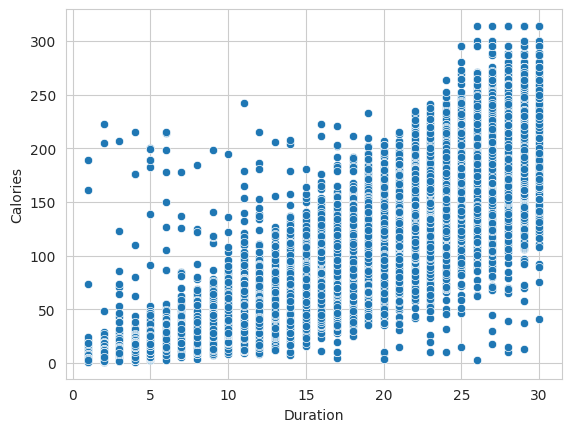

In [ ]:
#ver relacion scatter plot entre duration y calories
sns.scatterplot(x='Duration', y='Calories', data=train_df_copy[train_df_copy['Sex']==1])

<Axes: xlabel='Duration', ylabel='Calories'>

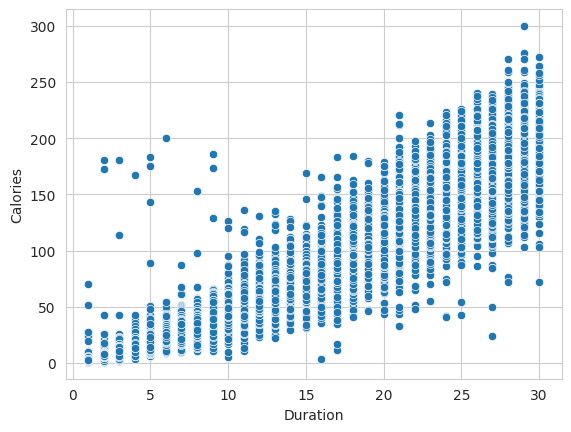

In [ ]:
sns.scatterplot(x='Duration', y='Calories', data=train_df_copy[train_df_copy['Sex']==0])

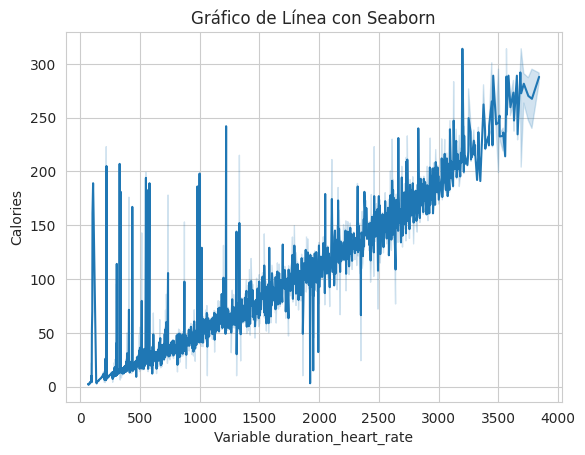

In [ ]:
#graficas de linea sobre el comportamiento de las nuevas variables y calories
# Supongamos que tienes tus datos en dos listas:
x = train_df_copy['duration_heart_rate']
y = train_df_copy['Calories']

# Crear el gráfico de línea con Seaborn
sns.lineplot(x=x, y=y)

# Añadir etiquetas a los ejes y un título (se usa Matplotlib para esto)
plt.xlabel("Variable duration_heart_rate")
plt.ylabel("Calories")
plt.title("Gráfico de Línea con Seaborn")

# Mostrar el gráfico
plt.show()

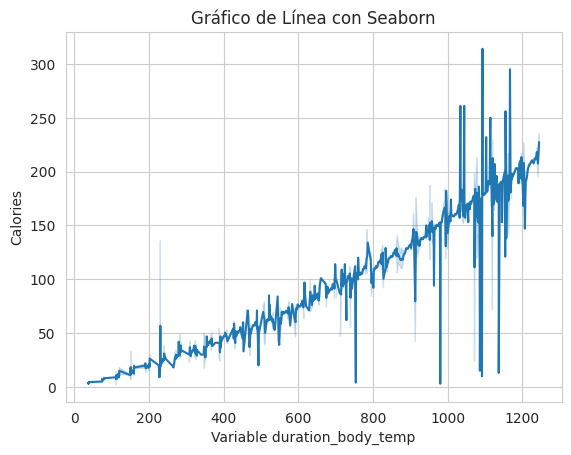

In [ ]:
#ahora con duration body temp
x = train_df_copy['duration_body_temp']
y = train_df_copy['Calories']

# Crear el gráfico de línea con Seaborn
sns.lineplot(x=x, y=y)

# Añadir etiquetas a los ejes y un título (se usa Matplotlib para esto)
plt.xlabel("Variable duration_body_temp")
plt.ylabel("Calories")
plt.title("Gráfico de Línea con Seaborn")

# Mostrar el gráfico
plt.show()

In [ ]:
import xgboost as xgb
# Modelos de regresión lineal
from sklearn.linear_model import LinearRegression

# Modelos basados en árboles
from sklearn.ensemble import RandomForestRegressor

# Modelos Gradient Boosting
import lightgbm as lgb
# Funciones de evaluación
from sklearn.metrics import mean_squared_error, r2_score

# Funciones de preprocesamiento de datos
from sklearn.model_selection import train_test_split
#sacar la metrica Root Mean Squared Logarithmic Error.
from sklearn.metrics import mean_squared_log_error

In [ ]:
train_df_copy.columns

Index(['id', 'Sex', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories',
       'age_group_20_30', 'age_group_30_40', 'age_group_40_50',
       'age_group_50_60', 'age_group_60_70', 'age_group_70_plus', 'imc',
       'duration_heart_rate', 'duration_body_temp', 'heart_rate_per_duration',
       'body_temp_per_duration', 'temp_per_rate'],
      dtype='object')

In [ ]:
X = train_df_copy.drop(['id','Calories'],axis=1)
y = train_df_copy['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [ ]:
#call the models
modelgbm = lgb.LGBMRegressor()
modelxgb = xgb.XGBRegressor()
modelrf = RandomForestRegressor()
modelreg = LinearRegression()
#fit with train
modelgbm.fit(X_train, y_train)
modelxgb.fit(X_train, y_train)
modelrf.fit(X_train, y_train)
modelreg.fit(X_train, y_train)
#preds
y_pred_gbm = modelgbm.predict(X_test)
y_pred_xgb = modelxgb.predict(X_test)
y_pred_rf = modelrf.predict(X_test)
y_pred_reg = modelreg.predict(X_test)
#mse y r2
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_gbm = r2_score(y_test, y_pred_gbm)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_reg = r2_score(y_test, y_pred_reg)
#calculo de la metrica msle
#covertir todas las preds < 0 a 0
y_pred_gbm[y_pred_gbm < 0] = 0
y_pred_xgb[y_pred_xgb < 0] = 0
y_pred_rf[y_pred_rf < 0] = 0
y_pred_reg[y_pred_reg < 0] = 0
msle_gbm = mean_squared_log_error(y_test, y_pred_gbm)
msle_xgb = mean_squared_log_error(y_test, y_pred_xgb)
msle_rf = mean_squared_log_error(y_test, y_pred_rf)
msle_reg = mean_squared_log_error(y_test, y_pred_reg)

#print a table with the results
print(pd.DataFrame({'Model': ['GBM', 'XGB', 'RF', 'Reg'],
                   'MSE': [mse_gbm, mse_xgb, mse_rf, mse_reg],
                   'R2': [r2_gbm, r2_xgb, r2_rf, r2_reg],
                    'MSLE' : [msle_gbm, msle_xgb, msle_rf, msle_reg]}))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.042787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1649
[LightGBM] [Info] Number of data points in the train set: 525000, number of used features: 16
[LightGBM] [Info] Start training from score 88.295086
  Model        MSE        R2      MSLE
0   GBM  21.008583  0.994596  0.005446
1   XGB  20.596453  0.994702  0.005173
2    RF  24.807203  0.993619  0.005552
3   Reg  67.374481  0.982670  0.105480


In [ ]:
#sacar la metrica Root Mean Squared Logarithmic Error.
from sklearn.metrics import mean_squared_log_error

#calculo de la metrica
msle_gbm = mean_squared_log_error(y_test, y_pred_gbm)
msle_xgb = mean_squared_log_error(y_test, y_pred_xgb)
msle_rf = mean_squared_log_error(y_test, y_pred_rf)
#convertir todos los negativos de y_pred_reg en 0
y_pred_reg[y_pred_reg < 0] = 0
msle_reg = mean_squared_log_error(y_test, y_pred_reg)

print(pd.DataFrame({'Model': ['GBM', 'XGB', 'RF', 'Reg'],
                   'MSLE': [msle_gbm, msle_xgb, msle_rf, msle_reg]}))

  Model      MSLE
0   GBM  0.005817
1   XGB  0.005247
2    RF  0.005612
3   Reg  0.311415


In [ ]:
#aplicamos el tratamiento de variables en test
test_df_copy = test_df.copy()
test_df_copy['Sex'] = test_df_copy['Sex'].apply(lambda x: 1 if x == 'male' else 0)
test_df_copy['age_group_20_30'] = test_df_copy['Age'].apply(lambda x: 1 if 20 <= x < 30 else 0)
test_df_copy['age_group_30_40'] = test_df_copy['Age'].apply(lambda x: 1 if 30 <= x < 40 else 0)
test_df_copy['age_group_40_50'] = test_df_copy['Age'].apply(lambda x: 1 if 40 <= x < 50 else 0)
test_df_copy['age_group_50_60'] = test_df_copy['Age'].apply(lambda x: 1 if 50 <= x < 60 else 0)
test_df_copy['age_group_60_70'] = test_df_copy['Age'].apply(lambda x: 1 if 60 <= x < 70 else 0)
test_df_copy['age_group_70_plus'] = test_df_copy['Age'].apply(lambda x: 1 if 70 <= x else 0)
test_df_copy['imc'] = test_df_copy['Weight'] / (test_df_copy['Height']/100)**2
test_df_copy.drop(['Height', 'Weight','Age'], axis=1, inplace=True)
test_df_copy['duration_heart_rate'] = test_df_copy['Duration'] * test_df_copy['Heart_Rate']
test_df_copy['duration_body_temp'] = test_df_copy['Duration'] * test_df_copy['Body_Temp']
test_df_copy['heart_rate_per_duration'] = test_df_copy['Heart_Rate'] / test_df_copy['Duration']
test_df_copy['body_temp_per_duration'] = test_df_copy['Body_Temp'] / test_df_copy['Duration']
test_df_copy['temp_per_rate'] = test_df_copy['Body_Temp'] / test_df_copy['Heart_Rate']
test_df_copy.head()

,id,Sex,Duration,Heart_Rate,Body_Temp,age_group_20_30,age_group_30_40,age_group_40_50,age_group_50_60,age_group_60_70,age_group_70_plus,imc,duration_heart_rate,duration_body_temp,heart_rate_per_duration,body_temp_per_duration,temp_per_rate
0,750000,1,7.0,87.0,39.8,0,0,1,0,0,0,25.854639,609.0,278.6,12.428571,5.685714,0.457471
1,750001,1,20.0,101.0,40.5,1,0,0,0,0,0,24.250000,2020.0,810.0,5.050000,2.025000,0.400990
2,750002,0,16.0,102.0,40.4,1,0,0,0,0,0,24.049344,1632.0,646.4,6.375000,2.525000,0.396078
3,750003,0,20.0,107.0,40.6,0,1,0,0,0,0,24.675500,2140.0,812.0,5.350000,2.030000,0.379439
4,750004,0,16.0,94.0,40.5,0,1,0,0,0,0,22.386314,1504.0,648.0,5.875000,2.531250,0.430851


In [ ]:
df_test = test_df_copy.drop(['id'], axis=1)

In [ ]:
#aplicamos y guardamos las predicciones de gbm,xgb y rf
y_pred_gbm = modelgbm.predict(df_test)
y_pred_xgb = modelxgb.predict(df_test)
y_pred_rf = modelrf.predict(df_test)

In [ ]:
#convertir los negativos en 0
y_pred_gbm[y_pred_gbm < 0] = 0
y_pred_xgb[y_pred_xgb < 0] = 0
y_pred_rf[y_pred_rf < 0] = 0

In [ ]:
sample_submission_df['Calories'] = y_pred_gbm
sample_submission_df.to_csv('submission_gbm.csv', index=False)
sample_submission_df['Calories'] = y_pred_xgb
sample_submission_df.to_csv('submission_xgb.csv', index=False)
sample_submission_df['Calories'] = y_pred_rf
sample_submission_df.to_csv('submission_rf.csv', index=False)

In [ ]:
#aplicamos tratamiento de variables en train extra
train_extra_df_copy = train_extra_df.copy()
train_extra_df_copy.rename(columns={'Calories Burned': 'Calories'}, inplace=True)
train_extra_df_copy.rename(columns={'Gender' : 'Sex'}, inplace = True)
train_extra_df_copy['Sex'] = train_extra_df_copy['Sex'].apply(lambda x: 1 if x == 'male' else 0)
train_extra_df_copy['age_group_20_30'] = train_extra_df_copy['Age'].apply(lambda x: 1 if x < 30 else 0)
train_extra_df_copy['age_group_30_40'] = train_extra_df_copy['Age'].apply(lambda x: 1 if 30 <= x < 40 else 0)
train_extra_df_copy['age_group_40_50'] = train_extra_df_copy['Age'].apply(lambda x: 1 if 40 <= x < 50 else 0)
train_extra_df_copy['age_group_50_60'] = train_extra_df_copy['Age'].apply(lambda x: 1 if 50 <= x < 60 else 0)
train_extra_df_copy['age_group_60_70'] = train_extra_df_copy['Age'].apply(lambda x: 1 if 60 <= x < 70 else 0)
train_extra_df_copy['age_group_70_plus'] = train_extra_df_copy['Age'].apply(lambda x: 1 if 70 <= x else 0)
train_extra_df_copy['imc'] = train_extra_df_copy['Weight'] / (train_extra_df_copy['Height']/100)**2
train_extra_df_copy.drop(['Height', 'Weight','Age'], axis=1, inplace=True)
train_extra_df_copy['duration_heart_rate'] = train_extra_df_copy['Duration'] * train_extra_df_copy['Heart_Rate']
train_extra_df_copy['duration_body_temp'] = train_extra_df_copy['Duration'] * train_extra_df_copy['Body_Temp']
train_extra_df_copy['heart_rate_per_duration'] = train_extra_df_copy['Heart_Rate'] / train_extra_df_copy['Duration']
train_extra_df_copy['body_temp_per_duration'] = train_extra_df_copy['Body_Temp'] / train_extra_df_copy['Duration']
train_extra_df_copy['temp_per_rate'] = train_extra_df_copy['Body_Temp'] / train_extra_df_copy['Heart_Rate']
train_extra_df_copy.head()

,User_ID,Sex,Duration,Heart_Rate,Body_Temp,Calories,age_group_20_30,age_group_30_40,age_group_40_50,age_group_50_60,age_group_60_70,age_group_70_plus,imc,duration_heart_rate,duration_body_temp,heart_rate_per_duration,body_temp_per_duration,temp_per_rate
0,14733363,1,29.0,105.0,40.8,231.0,0,0,0,0,1,0,26.038781,3045.0,1183.2,3.620690,1.406897,0.388571
1,14861698,0,14.0,94.0,40.3,66.0,1,0,0,0,0,0,21.773842,1316.0,564.2,6.714286,2.878571,0.428723
2,11179863,1,5.0,88.0,38.7,26.0,0,0,0,0,1,0,24.655910,440.0,193.5,17.600000,7.740000,0.439773
3,16180408,0,13.0,100.0,40.5,71.0,0,1,0,0,0,0,22.159109,1300.0,526.5,7.692308,3.115385,0.405000
4,17771927,0,10.0,81.0,39.8,35.0,1,0,0,0,0,0,24.456063,810.0,398.0,8.100000,3.980000,0.491358


In [ ]:
#entrenamos los modelos con train extra
X = train_extra_df_copy.drop(['User_ID','Calories'],axis=1)
y = train_extra_df_copy['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=28)

In [ ]:
#call the models
modelgbm = lgb.LGBMRegressor()
modelxgb = xgb.XGBRegressor()
modelrf = RandomForestRegressor()
modelreg = LinearRegression()
#fit with train
modelgbm.fit(X_train, y_train)
modelxgb.fit(X_train, y_train)
modelrf.fit(X_train, y_train)
modelreg.fit(X_train, y_train)
#preds
y_pred_gbm = modelgbm.predict(X_test)
y_pred_xgb = modelxgb.predict(X_test)
y_pred_rf = modelrf.predict(X_test)
y_pred_reg = modelreg.predict(X_test)
#mse y r2
mse_gbm = mean_squared_error(y_test, y_pred_gbm)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
mse_rf = mean_squared_error(y_test, y_pred_rf)
mse_reg = mean_squared_error(y_test, y_pred_reg)
r2_gbm = r2_score(y_test, y_pred_gbm)
r2_xgb = r2_score(y_test, y_pred_xgb)
r2_rf = r2_score(y_test, y_pred_rf)
r2_reg = r2_score(y_test, y_pred_reg)
#calculo de la metrica msle
#covertir todas las preds < 0 a 0
y_pred_gbm[y_pred_gbm < 0] = 0
y_pred_xgb[y_pred_xgb < 0] = 0
y_pred_rf[y_pred_rf < 0] = 0
y_pred_reg[y_pred_reg < 0] = 0
msle_gbm = mean_squared_log_error(y_test, y_pred_gbm)
msle_xgb = mean_squared_log_error(y_test, y_pred_xgb)
msle_rf = mean_squared_log_error(y_test, y_pred_rf)
msle_reg = mean_squared_log_error(y_test, y_pred_reg)

#print a table with the results
print(pd.DataFrame({'Model': ['GBM', 'XGB', 'RF', 'Reg'],
                   'MSE': [mse_gbm, mse_xgb, mse_rf, mse_reg],
                   'R2': [r2_gbm, r2_xgb, r2_rf, r2_reg],
                    'MSLE' : [msle_gbm, msle_xgb, msle_rf, msle_reg]}))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000862 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1647
[LightGBM] [Info] Number of data points in the train set: 10500, number of used features: 16
[LightGBM] [Info] Start training from score 89.733048
  Model        MSE        R2      MSLE
0   GBM  14.243507  0.996328  0.003192
1   XGB  16.554044  0.995732  0.003362
2    RF  17.547094  0.995476  0.003343
3   Reg  71.394492  0.981595  0.132095


In [ ]:
#aplicamos y guardamos las predicciones de gbm,xgb y rf
y_pred_gbm = modelgbm.predict(df_test)
y_pred_xgb = modelxgb.predict(df_test)
y_pred_rf = modelrf.predict(df_test)

In [ ]:
#convertir los negativos en 0
y_pred_gbm[y_pred_gbm < 0] = 0
y_pred_xgb[y_pred_xgb < 0] = 0
y_pred_rf[y_pred_rf < 0] = 0

In [ ]:
sample_submission_df['Calories'] = y_pred_gbm
sample_submission_df.to_csv('submission_gbm_extra.csv', index=False)
sample_submission_df['Calories'] = y_pred_xgb
sample_submission_df.to_csv('submission_xgb_extra.csv', index=False)
sample_submission_df['Calories'] = y_pred_rf
sample_submission_df.to_csv('submission_rf_extra.csv', index=False)

In [ ]:
#vamos a minimizar el msle ajustando los parametros de xgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_log_error
import numpy as np

X = train_df_copy.drop(['id','Calories'],axis=1)
y = train_df_copy['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Definir el modelo XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmsle',n_jobs = -1)
# Usamos 'reg:squarederror' como objetivo base y luego evaluamos con RMSLE durante la validación.
# El MSLE no está directamente disponible como una métrica de objetivo en XGBoost para la optimización,
# pero el RMSE (raíz del error cuadrático medio) suele ser una buena aproximación para minimizar el error general.
# Evaluaremos el MSLE por separado durante la validación.

# 3. Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# 4. Configurar la búsqueda por validación cruzada (GridSearchCV)
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',  # Usamos MSE negativo como métrica de scoring
                           cv=3,  # Número de folds en la validación cruzada
                           verbose=2,
                           n_jobs=-1)  # Usa todos los núcleos de la CPU

# 5. Ejecutar la búsqueda
grid_search.fit(X_train, y_train)

# 6. Obtener los mejores parámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Mejores parámetros encontrados:", best_params)

# 7. Evaluar el modelo en el conjunto de prueba usando MSLE
y_pred = best_model.predict(X_test)

# Asegurarse de que las predicciones no sean negativas antes de calcular MSLE
y_pred[y_pred < 0] = 0  # O manejar los valores negativos de otra manera apropiada

msle = mean_squared_log_error(y_test, y_pred)
rmse_msle = np.sqrt(msle)

print(f"MSLE en el conjunto de prueba con el mejor modelo: {msle:.4f}")
print(f"RMSE del MSLE en el conjunto de prueba: {rmse_msle:.4f}")

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Mejores parámetros encontrados: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
MSLE en el conjunto de prueba con el mejor modelo: 0.0047
RMSE del MSLE en el conjunto de prueba: 0.0687


In [ ]:
#guardamos esos parametros para futuro
parametros_xgb = {'colsample_bytree': .8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1}

                    Feature  Importance
11      duration_heart_rate    0.756658
12       duration_body_temp    0.139750
4           age_group_20_30    0.029078
5           age_group_30_40    0.018705
8           age_group_60_70    0.009857
9         age_group_70_plus    0.009091
2                Heart_Rate    0.008754
0                       Sex    0.008081
6           age_group_40_50    0.006792
1                  Duration    0.006234
7           age_group_50_60    0.002796
15            temp_per_rate    0.002580
10                      imc    0.000986
3                 Body_Temp    0.000335
13  heart_rate_per_duration    0.000189
14   body_temp_per_duration    0.000113


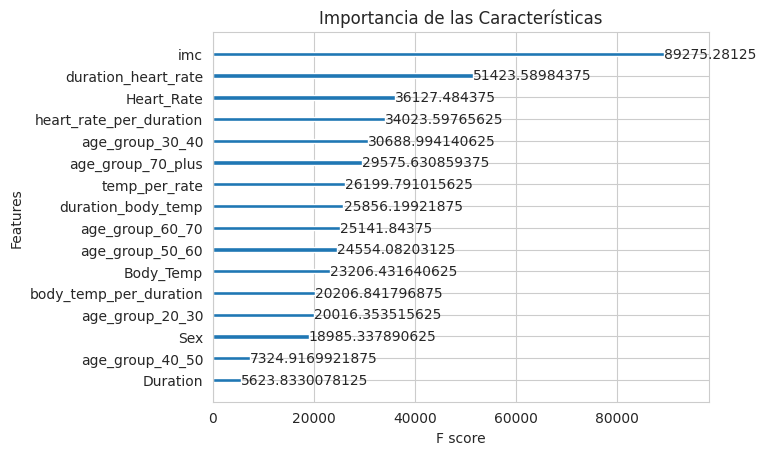

In [ ]:
importancia = best_model.feature_importances_
feature_names = X.columns
# Crear un DataFrame para mostrar la importancia con nombres de características
df_importancia = pd.DataFrame({'Feature': feature_names, 'Importance': importancia})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)
print(df_importancia)

# 4. Visualizar la importancia de las características
# Changed from xgb_model to best_model
xgb.plot_importance(best_model, importance_type='cover', show_values=True)  # Puedes cambiar 'gain' por 'weight' o 'cover'
plt.title("Importancia de las Características")
plt.show()

Target looks like regression


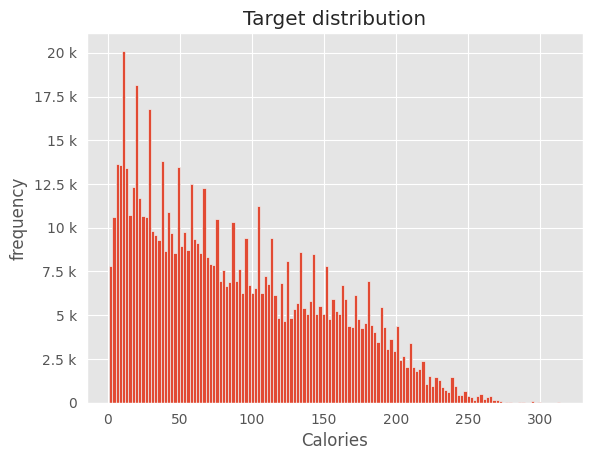

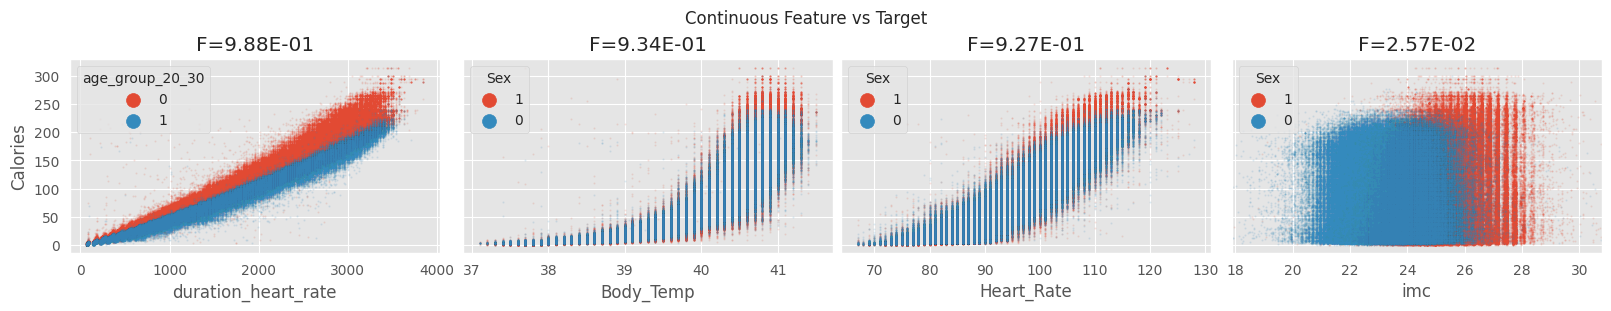

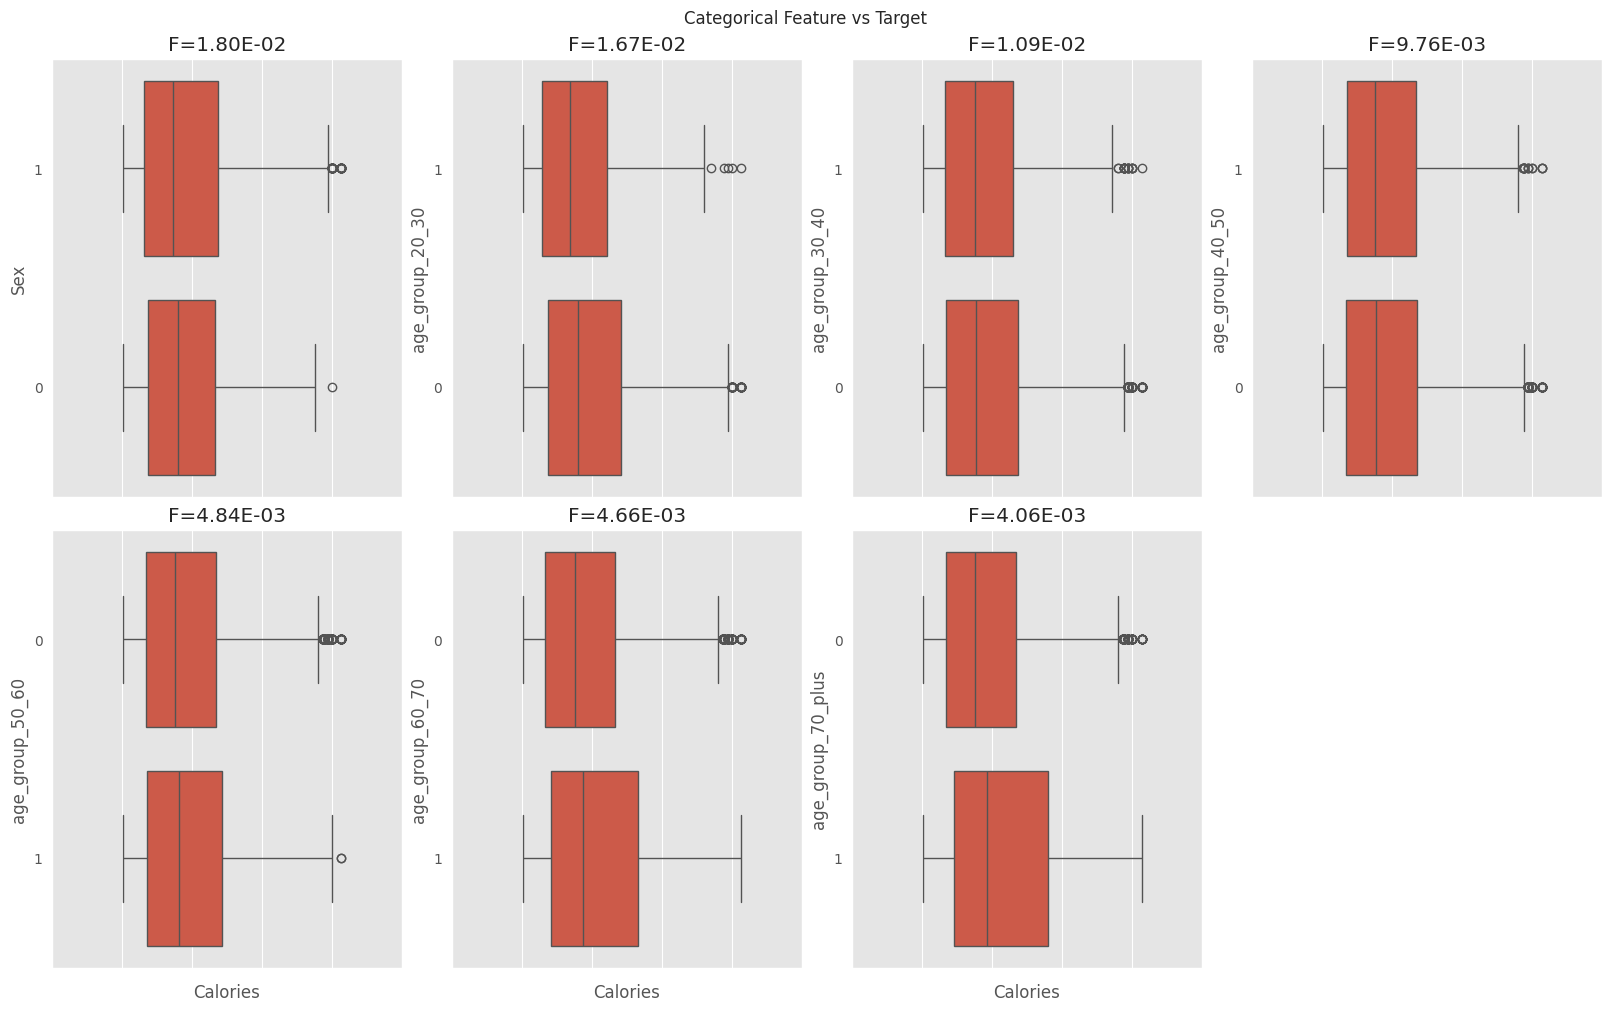

In [ ]:
#ahora si utilizar dabl
import dabl
plt.style.use('ggplot')
warnings.filterwarnings('ignore')
dabl.plot(train_df_copy.drop(['id'],axis=1), target_col = 'Calories',type_hints={'Calories': 'continuous'})
# Acceder a la figura y los ejes
fig, ax = plt.gcf(), plt.gca()

# Eliminar la cuadrícula
ax.grid(False)

# Mostrar el gráfico
plt.show()

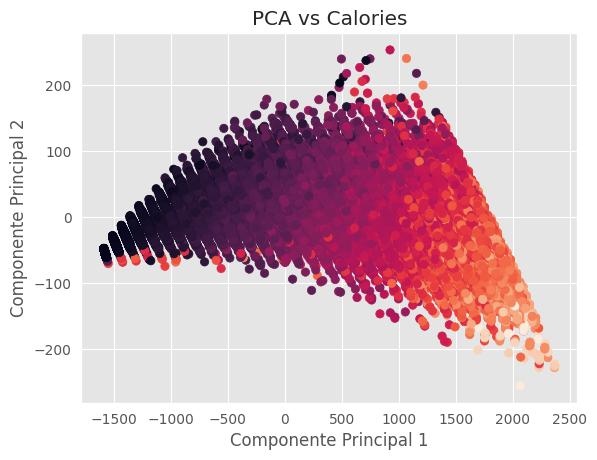

In [ ]:
#haremos componentes principales
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
#graficar los pca vs calories
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA vs Calories')
plt.show()

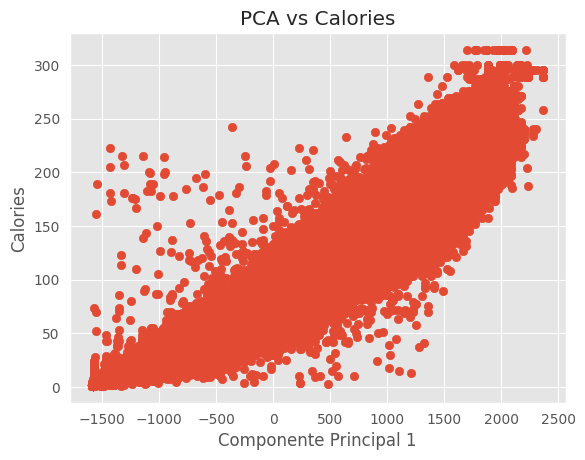

In [ ]:
plt.scatter(X_pca[:, 0], y)
plt.xlabel('Componente Principal 1')
plt.ylabel('Calories')
plt.title('PCA vs Calories')
plt.show()

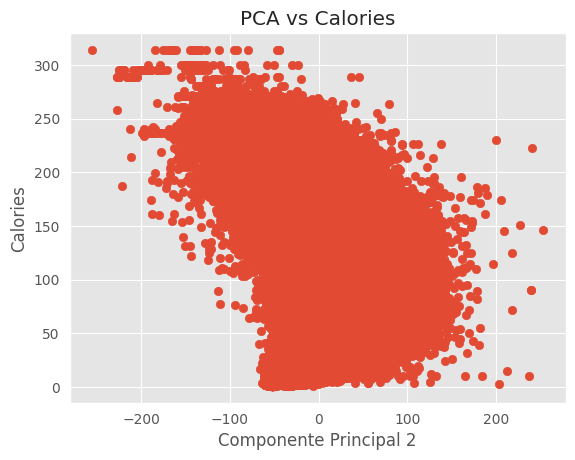

In [ ]:
plt.scatter(X_pca[:, 1], y)
plt.xlabel('Componente Principal 2')
plt.ylabel('Calories')
plt.title('PCA vs Calories')
plt.show()

In [ ]:
#agregar estos 2 PCA a X para entrenar el best_model
X['pca_1'] = X_pca[:, 0]
X['pca_2'] = X_pca[:, 1]
xgb_pca= xgb.XGBRegressor(colsample_bytree = .8, learning_rate = 0.1, max_depth = 7, n_estimators = 300, subsample = 1)
#fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_pca.fit(X_train, y_train)
#sacar msle
y_pred = xgb_pca.predict(X_test)
y_pred[y_pred < 0] = 0
msle = mean_squared_log_error(y_test, y_pred)
rmse_msle = np.sqrt(msle)
print(f"MSLE en el conjunto de prueba con el mejor modelo: {msle:.4f}")
print(f"RMSE del MSLE en el conjunto de prueba: {rmse_msle:.4f}")

MSLE en el conjunto de prueba con el mejor modelo: 0.0047
RMSE del MSLE en el conjunto de prueba: 0.0683


                    Feature  Importance
11      duration_heart_rate    0.641312
16                    pca_1    0.256529
12       duration_body_temp    0.027810
4           age_group_20_30    0.022743
8           age_group_60_70    0.010349
5           age_group_30_40    0.010228
9         age_group_70_plus    0.009370
0                       Sex    0.005788
2                Heart_Rate    0.005662
7           age_group_50_60    0.005154
6           age_group_40_50    0.001841
17                    pca_2    0.001452
10                      imc    0.000701
15            temp_per_rate    0.000564
1                  Duration    0.000163
3                 Body_Temp    0.000144
13  heart_rate_per_duration    0.000114
14   body_temp_per_duration    0.000076


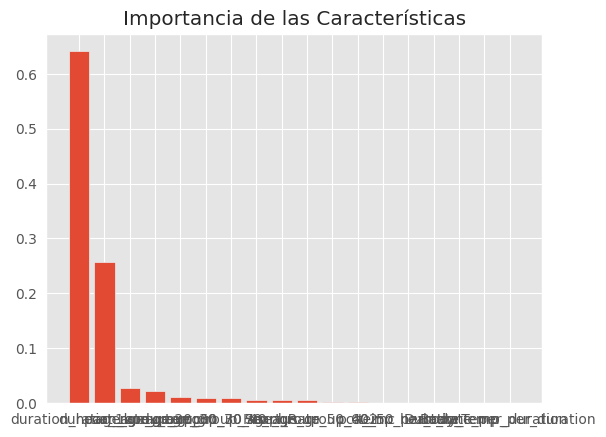

In [ ]:
importancia = xgb_pca.feature_importances_
feature_names = X.columns
# Crear un DataFrame para mostrar la importancia con nombres de características
df_importancia = pd.DataFrame({'Feature': feature_names, 'Importance': importancia})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)
print(df_importancia)

# 4. Visualizar la importancia de las características
# Changed from xgb_model to best_model
plt.bar(df_importancia['Feature'],df_importancia['Importance'])# Puedes cambiar 'gain' por 'weight' o 'cover'
plt.title("Importancia de las Características")
plt.show()

In [ ]:
#rehacer el modelo con las 8 caracteristicas mas importantes
feat_imp = df_importancia.head(8)

In [ ]:
columns_ = feat_imp['Feature'].unique()

MSLE en el conjunto de prueba con el mejor modelo: 0.0056
RMSE del MSLE en el conjunto de prueba: 0.0747
               Feature  Importance
0  duration_heart_rate    0.508356
1                pca_1    0.333792
2   duration_body_temp    0.051837
3      age_group_20_30    0.038196
5      age_group_30_40    0.018869
6    age_group_70_plus    0.018091
4      age_group_60_70    0.016814
7                  Sex    0.014045


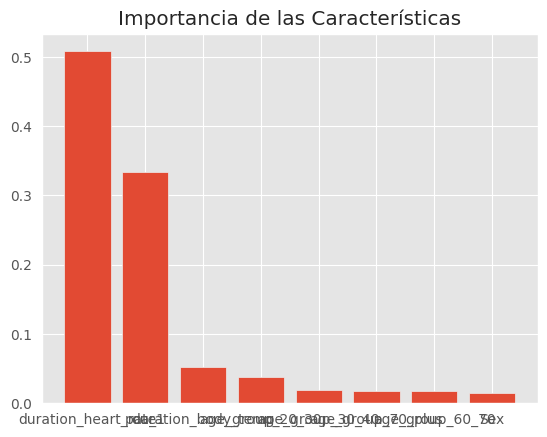

In [ ]:
X = X[columns_]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_8_feat = xgb.XGBRegressor(colsample_bytree = .8, learning_rate = 0.1, max_depth = 7, n_estimators = 300, subsample = 1)
xgb_8_feat.fit(X_train, y_train)
y_pred = xgb_8_feat.predict(X_test)
y_pred[y_pred < 0] = 0
msle = mean_squared_log_error(y_test, y_pred)
rmse_msle = np.sqrt(msle)
print(f"MSLE en el conjunto de prueba con el mejor modelo: {msle:.4f}")
print(f"RMSE del MSLE en el conjunto de prueba: {rmse_msle:.4f}")
importancia = xgb_8_feat.feature_importances_
feature_names = X.columns
# Crear un DataFrame para mostrar la importancia con nombres de características
df_importancia = pd.DataFrame({'Feature': feature_names, 'Importance': importancia})
df_importancia = df_importancia.sort_values(by='Importance', ascending=False)
print(df_importancia)

# 4. Visualizar la importancia de las características
# Changed from xgb_model to best_model
plt.bar(df_importancia['Feature'],df_importancia['Importance'])# Puedes cambiar 'gain' por 'weight' o 'cover'
plt.title("Importancia de las Características")
plt.show()

In [ ]:
#sacamos los PCA para df_test
df_test_pca = pca.transform(df_test)
df_test['pca_1'] = df_test_pca[:, 0]
df_test['pca_2'] = df_test_pca[:, 1]
y_pred_8_feat = xgb_8_feat.predict(df_test[columns_])
y_pred_8_feat[y_pred_8_feat < 0] = 0
sample_submission_df['Calories'] = y_pred_8_feat
sample_submission_df.to_csv('submission_xgb_8_feat.csv', index=False)

In [ ]:
#probamos test_df_copy con estos parametros
y_pred_xgb = best_model.predict(df_test)
y_pred_xgb[y_pred_xgb < 0] = 0
sample_submission_df['Calories'] = y_pred_xgb
sample_submission_df.to_csv('submission_xgb_grid.csv', index=False)

In [ ]:
#vamos a probar con transformaciones de la variable calorias log+1 para empezar
train_df_copy['Calories'] = np.log1p(train_df_copy['Calories'])
#asi como columnas extra con trnasformacion log
train_df_copy['duration_heart_rate_log1'] = np.log1p(train_df_copy['duration_heart_rate'])
train_df_copy['duration_body_temp_log1'] = np.log1p(train_df_copy['duration_body_temp'])
train_df_copy['Heart_Rate_log1'] = np.log1p(train_df_copy['Heart_Rate'])

In [ ]:
#hacemos un modelo con todas estas caracteristicas
X = train_df_copy.drop(['id','Calories'],axis=1)
y = train_df_copy['Calories']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
xgb_log = xgb.XGBRegressor(colsample_bytree = .8, learning_rate = 0.1, max_depth = 7, n_estimators = 300, subsample = 1)
xgb_log.fit(X_train, y_train)
y_pred = xgb_log.predict(X_test)
y_pred[y_pred < 0] = 0
msle = mean_squared_log_error(y_test, y_pred)
rmse_msle = np.sqrt(msle)
print(f"MSLE en el conjunto de prueba con el mejor modelo: {msle:.4f}")
print(f"RMSE del MSLE en el conjunto de prueba: {rmse_msle:.4f}")

MSLE en el conjunto de prueba con el mejor modelo: 0.0003
RMSE del MSLE en el conjunto de prueba: 0.0187


In [ ]:
#msle con resultados traidos con +1 exp
msle_normal = mean_squared_log_error(np.expm1(y_test), np.expm1(y_pred))
msle_normal

0.004475906368727359

In [ ]:
#agregamos las columnas log a test
test_df_copy['duration_heart_rate_log1'] = np.log1p(test_df_copy['duration_heart_rate'])
test_df_copy['duration_body_temp_log1'] = np.log1p(test_df_copy['duration_body_temp'])
test_df_copy['Heart_Rate_log1'] = np.log1p(test_df_copy['Heart_Rate'])
y_preds_log = xgb_log.predict(test_df_copy.drop(['id'],axis=1))
y_pred_normal = np.expm1(y_preds_log)
y_pred_normal[y_pred_normal<0] = 0
sample_submission_df['Calories'] = y_pred_normal
sample_submission_df.to_csv('submission_xgb_log.csv', index=False)